In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import Common_Functions as cmn

# Combine All Regressions into one Graph

In [18]:
sns.set_context("poster")
sns.set_style("ticks")

In [19]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["Random Forest Prediction"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["Gradient Boosted Regressor Prediction"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS Prediction"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGBoost Regressor"] = xgb.iloc[:,-1:]

prices.head(10)

,SalePrice,Random Forest Prediction,Gradient Boosted Regressor Prediction,OLS Prediction,XGBoost Regressor
0,208500,201605.405644,200987.035582,227243.598710,203864.280
1,181500,167914.166931,166379.335089,196355.868944,166006.050
2,223500,213785.525125,211539.116328,222831.166926,217937.500
3,140000,180254.549919,177405.974292,199358.318716,176473.830
4,250000,293904.255031,291051.111189,295552.240770,286894.940
5,143000,163914.319744,160366.658434,178645.733189,158264.860
6,307000,290624.806044,295582.817054,272538.422890,304965.160
7,200000,205306.786794,209634.481749,251870.815786,224092.600
8,129900,164165.078550,163532.896148,189753.427301,166114.940
9,118000,121912.664944,119945.073066,83918.353787,117998.414


<AxesSubplot:>

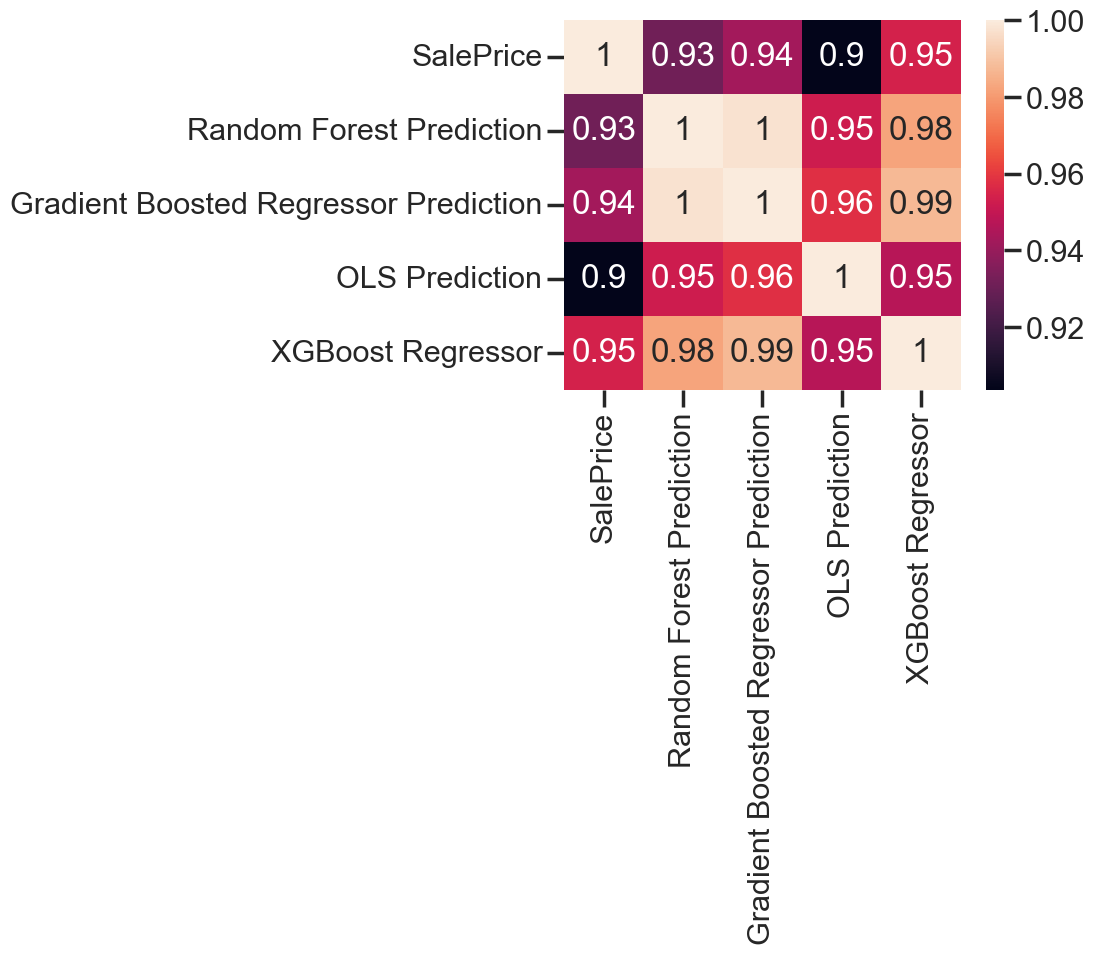

In [20]:
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

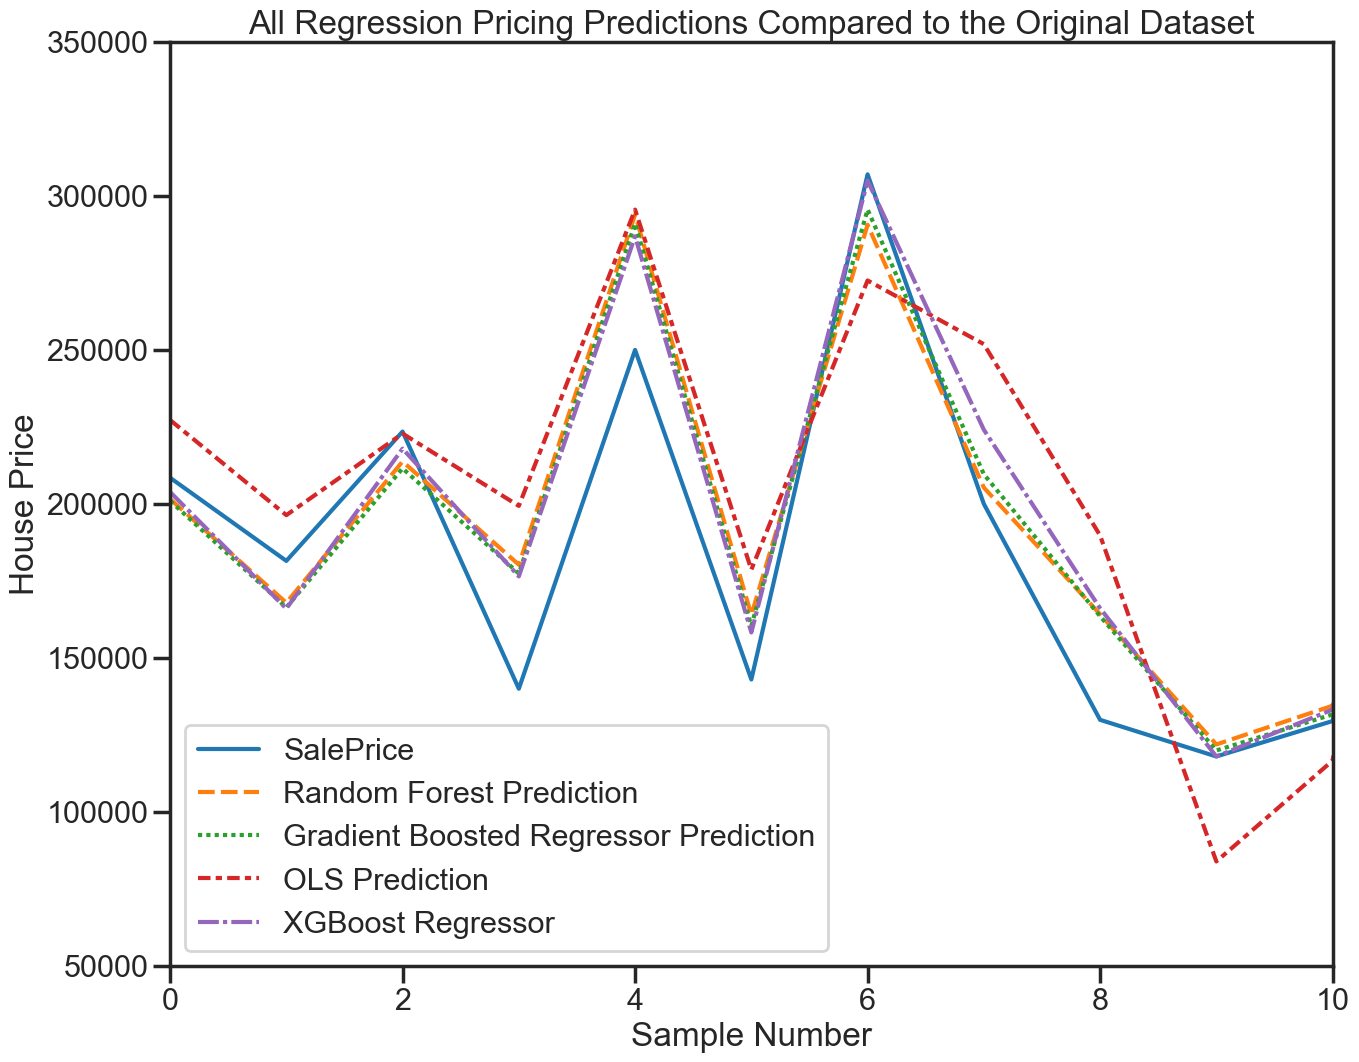

In [21]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(50000, 350000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

Text(0, 0.5, 'House Price')

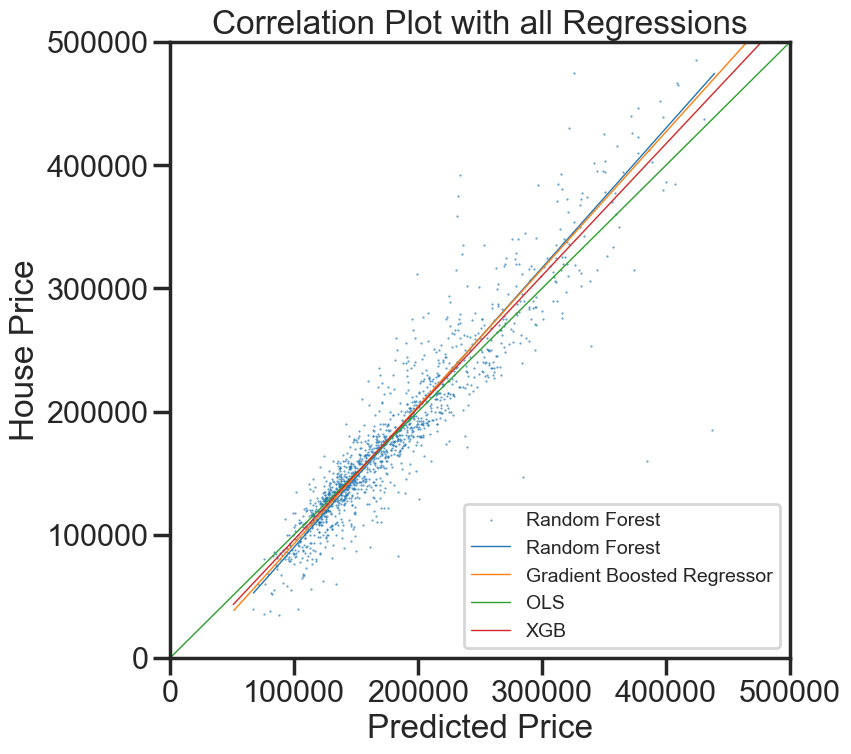

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 500000)
plt.ylim(0, 500000)
#plt.tight_layout()
plt.title("Correlation Plot with all Regressions")
# always label your axes

sns.regplot(data=prices, x=prices.iloc[:,1:2], y="SalePrice", label="RF", ci=None, scatter_kws={'s':1}, marker=".", line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,2:3], y="SalePrice", scatter=False, label="Gradient Boosted Regressor", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,3:4], y="SalePrice", scatter=False, label="OLS", ci=None, line_kws={"linewidth":1})
sns.regplot(data=prices, x=prices.iloc[:,4:5], y="SalePrice", scatter=False, label="XGB", ci=None, line_kws={"linewidth":1})

plt.legend(labels=["Random Forest","Random Forest", "Gradient Boosted Regressor", "OLS", "XGB"], prop={'size': 14})
plt.xlabel(r"Predicted Price")
plt.ylabel(r"House Price")

# Weightings based on Perceived Accuracy

In [32]:
observed_price = cmn.get_stringless_training_data()
prices = observed_price.iloc[:,-1:]
rf = pd.read_csv("Exported_Data/RandomForestPrediction.csv")
prices["Random Forest Prediction"] = rf.iloc[:,-1:]

gbr = pd.read_csv("Exported_Data/GBR.csv")
prices["Gradient Boosted Regressor Prediction"] = gbr.iloc[:,-1:]

ols = pd.read_csv("Exported_Data/OLS.csv")
prices["OLS Prediction"] = ols.iloc[:,-1:]

xgb = pd.read_csv("Exported_Data/XGB.csv")
prices["XGB Regressor Prediction"] = xgb.iloc[:,-1:]

In [35]:
weight = [.93/4, .94/4, .5/4, .95/4]
columns = ["Random Forest Prediction", "Gradient Boosted Regressor Prediction", "OLS Prediction", "XGB Regressor Prediction"]
prices["Weighted Average"] = np.average(prices[columns], weights=weight, axis=1)

prices.head(10)

,SalePrice,Random Forest Prediction,Gradient Boosted Regressor Prediction,OLS Prediction,XGB Regressor Prediction,Weighted Average
0,208500,201605.405644,200987.035582,227243.598710,203864.280,208228.802563
1,181500,167914.166931,166379.335089,196355.868944,166006.050,173920.102091
2,223500,213785.525125,211539.116328,222831.166926,217937.500,216466.662083
3,140000,180254.549919,177405.974292,199358.318716,176473.830,183191.121668
4,250000,293904.255031,291051.111189,295552.240770,286894.940,291791.992309
5,143000,163914.319744,160366.658434,178645.733189,158264.860,165139.180957
6,307000,290624.806044,295582.817054,272538.422890,304965.160,291164.086089
7,200000,205306.786794,209634.481749,251870.815786,224092.600,222463.287304
8,129900,164165.078550,163532.896148,189753.427301,166114.940,170694.011560
9,118000,121912.664944,119945.073066,83918.353787,117998.414,111223.698599


<AxesSubplot:>

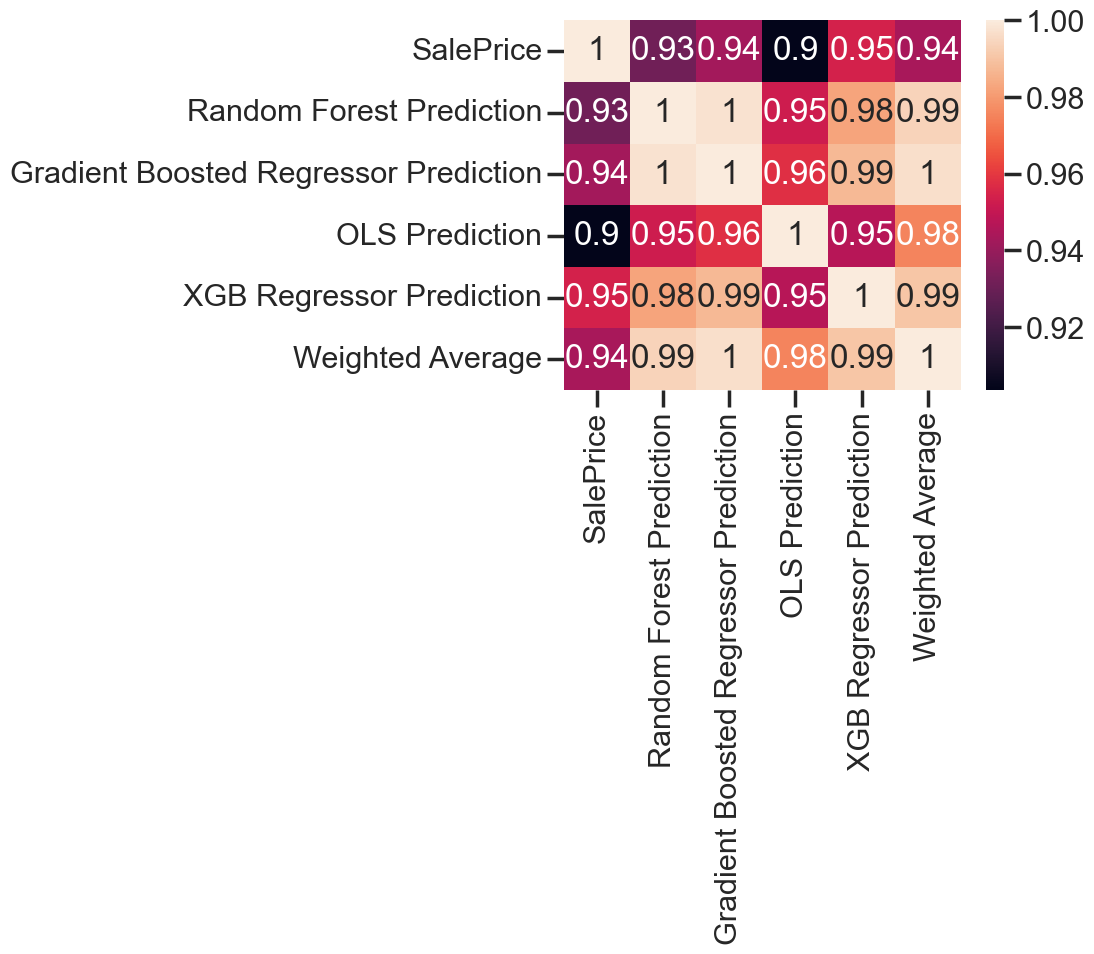

In [36]:
sns.heatmap(prices.corr().abs(),  annot=True)

<AxesSubplot:title={'center':'All Regression Pricing Predictions Compared to the Original Dataset'}, xlabel='Sample Number', ylabel='House Price'>

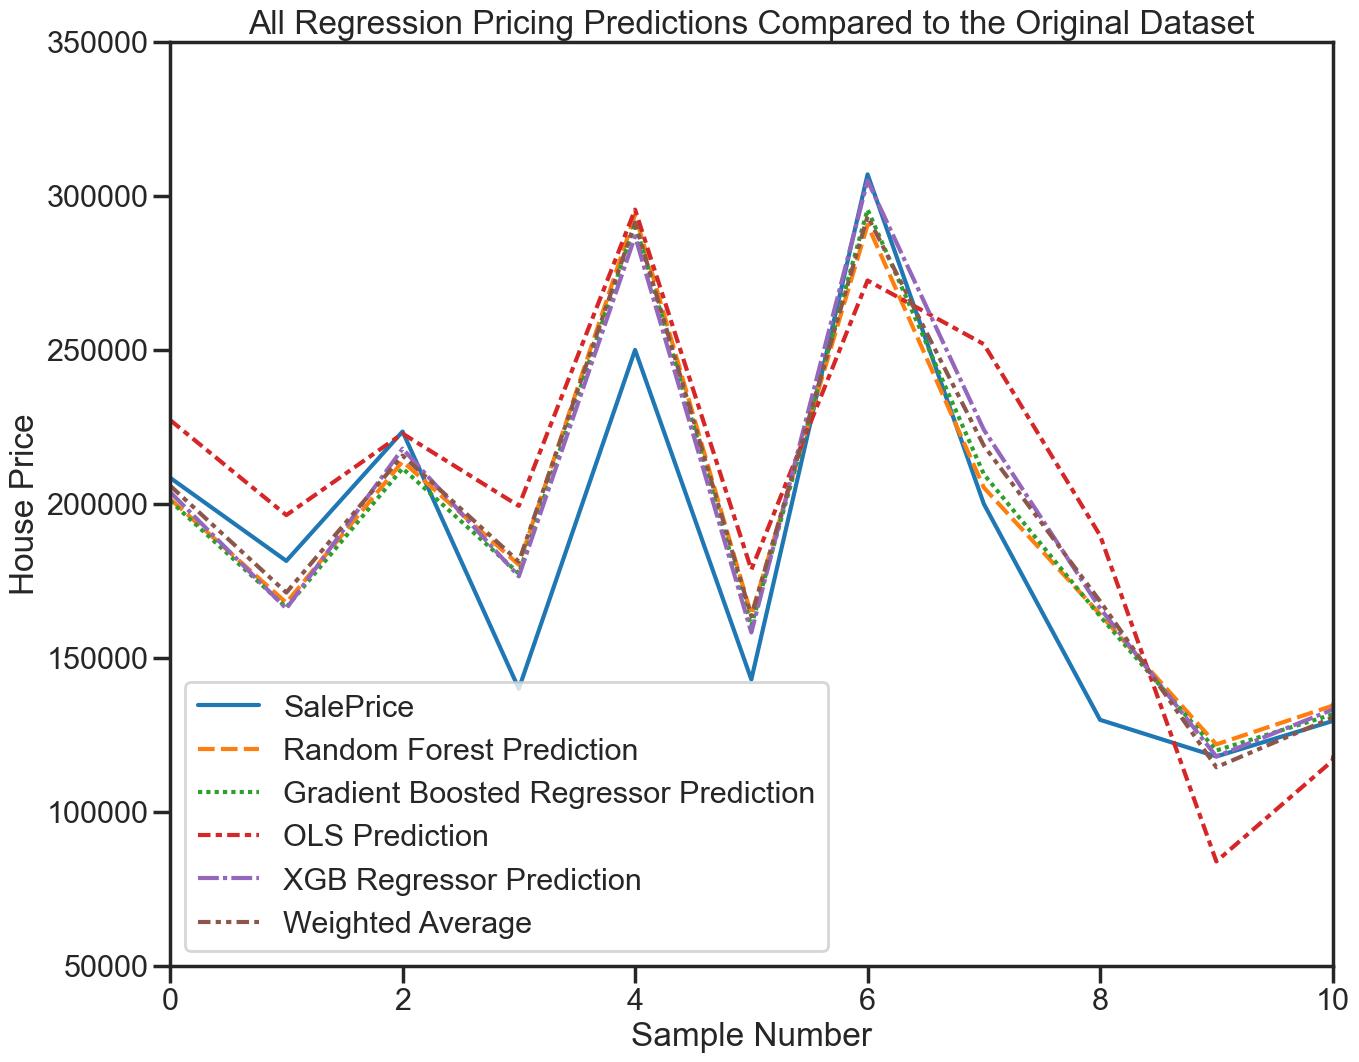

In [31]:
fig, ax = plt.subplots(figsize=(15, 12))
#ax = sns.lineplot(prices)

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#create a legend
plt.xlim(0, 10)
plt.ylim(50000, 350000)
#plt.tight_layout()
plt.title("All Regression Pricing Predictions Compared to the Original Dataset")
# always label your axes
plt.xlabel(r"Sample Number")
plt.ylabel(r"House Price")
sns.lineplot(data=prices)

In [29]:
#weighted = prices["Weighted Average"]
weighted = pd.DataFrame(i for i in range(1461,2920))
weighted = weighted.rename(columns={0:'Id'})
weighted["SalePrice"] = prices['Weighted Average']
weighted = weighted.set_index("Id")

pd.DataFrame(weighted).to_csv(f"{cmn.export_data_path}Weighted Submission.csv")